<h1 style='fontsize:48px; color:green;'> Pet Finder NLP Naive Bayes Classifier </h1>

In this notebook, I classify dogs vs. cats using a naive bayes classifier trained on the training set. The goal here is to train the model to succesfully tell the difference between a cat and a dog solely based on the name and description. This simple classification model is meant to demonstrate the functionality of NLP-based classification.

In [1]:
# data is located in './train/train.csv'

!head train/train.csv

Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.0,2
2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,6296e909a,2.0,0
1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her

<h1 style='fontsize:20px; color:green; margin-left:10px;'> Data Exploration </h1>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('train/train.csv')
df_train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [3]:
df_train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
#fill NaN with ''
df_train['Description'].fillna('', inplace=True)
df_train['Description'].isnull().any()

False

In [18]:
df_train['Name'].fillna('', inplace=True)
df_train['Name'].isnull().any()

False

In [19]:
#split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_train[['Name', 'Description']], df_train['Type'], test_size=0.3, random_state=0)

<h1 style='fontsize:20px; color:green; margin-left:10px;'> NLP of Pet Name/Descriptions + Naive Bayes Classifier </h1>

<i style='margin-left:10px;'> Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc. </i>

In [20]:
# import modules and create stopwords list for filtering of common words

import nltk
import string
from collections import Counter

useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
useless_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [21]:
# function that creates a 'bag of words' model for a list of words

def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words 
        if not word in useless_words}

In [90]:
# store all names in a list
all_names = x_train['Name'].tolist()
all_names[:5]

['Coco, Louie And Silo', 'Ruby', 'Koko', 'Polar Bear', 'GYPSIE & WILLOW']

In [91]:
# create list of all words in descriptions and all names

all_words_train = nltk.word_tokenize(x_train['Description'].sum()) + all_names
all_words_train[:5]

['Please', 'give', 'these', '3', 'stray']

In [92]:
all_words_train = [word.lower() for word in all_words_train]
all_words_train[:5]

['please', 'give', 'these', '3', 'stray']

In [93]:
len(all_words_train)

751399

In [94]:
# create word counter object for all words

word_counter = Counter(all_words_train)

In [95]:
# visualize most common words

word_counter.most_common()[:10]

[('.', 39553),
 ('and', 22013),
 (',', 21110),
 ('to', 20510),
 ('a', 16820),
 ('is', 12891),
 ('the', 12871),
 ('for', 10049),
 ('i', 8384),
 ('she', 7771)]

In [96]:
# the words haven't been filtered, so most common words are useless...

In [97]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)
sorted_word_counts[:10]

[39553, 22013, 21110, 20510, 16820, 12891, 12871, 10049, 8384, 7771]

In [98]:
# filter out useless words and return new counts

all_words_train_filtered = [word for word in all_words_train if not word in useless_words]
word_counter_filtered = Counter(all_words_train_filtered)
sorted_filtered_word_counts = sorted(list(word_counter_filtered.values()), reverse=True)

sorted_filtered_word_counts[:10]

[4861, 3884, 2964, 2776, 2658, 2615, 2454, 2341, 2198, 2073]

In [99]:
filtered_word_counter = Counter(all_words_train_filtered)
filtered_word_counter.most_common()[:10]

[('home', 4861),
 ('please', 3884),
 ('dog', 2964),
 ('--', 2776),
 ('cat', 2658),
 ("'s", 2615),
 ('good', 2454),
 ('adoption', 2341),
 ('adopt', 2198),
 ('give', 2073)]

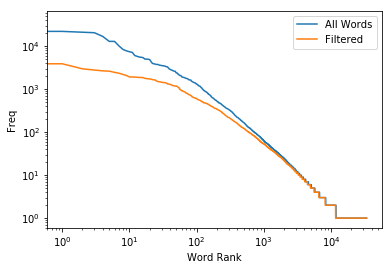

In [100]:
# visualize frequencies of all words vs. filtered words

import matplotlib.pyplot as plt
%matplotlib inline

plt.loglog(sorted_word_counts, label='All Words')
plt.loglog(sorted_filtered_word_counts, label='Filtered')
plt.ylabel("Freq")
plt.xlabel("Word Rank");
plt.legend()

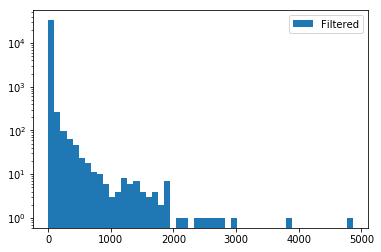

In [101]:
# visualize logarithmic distribution of sorted filtered word counts

plt.hist(sorted_filtered_word_counts, bins=50, log=True, label='Filtered');
plt.legend()

In [102]:
x_train['Words'] = x_train['Description'] + ' ' + x_train['Name']

In [103]:
x_train['Words'][1]

'I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care. No Name Yet'

In [114]:
# function that builds features from words

def build_features(x, y, target, column='Words'):
    assert(len(x) == len(y))
    features = [(build_bag_of_words_features_filtered(
    nltk.word_tokenize(words.lower())),target)
                  for words in x[y==target][column]]
    return features

# length of features for Type = 1 (dog)
len(build_features(x=x_train,y=y_train,target=1))

5711

In [115]:
# build set of features for cats and dogs

set_train = []
for target in sorted(y_train.unique()):
    set_train+=build_features(x=x_train,y=y_train,target=target)

len(set_train)

10495

In [184]:
# build type classifier from the set of features
import time

before = time.time()
type_classifier = nltk.classify.NaiveBayesClassifier.train(set_train)
after = time.time()

print('Time to build model: {} seconds'.format(after-before))
print('Classifier data type: {}'.format(type(type_classifier)))

Time to build model: 1.100343942642212 seconds
Classifier data type: <class 'nltk.classify.naivebayes.NaiveBayesClassifier'>


In [185]:
print('Accuracy of type classifier: {}%'.format(nltk.classify.util.accuracy(type_classifier, set_train)*100))

Accuracy of type classifier: 97.16055264411625%


In [186]:
type_classifier.show_most_informative_features()

Most Informative Features
                  kitten = 1                   2 : 1      =    239.6 : 1.0
                   puppy = 1                   1 : 2      =    139.1 : 1.0
                 kittens = 1                   2 : 1      =    134.8 : 1.0
                   tabby = 1                   2 : 1      =    117.4 : 1.0
                     pup = 1                   1 : 2      =    106.7 : 1.0
                   boleh = 1                   2 : 1      =     81.6 : 1.0
                     ada = 1                   2 : 1      =     72.8 : 1.0
                     tak = 1                   2 : 1      =     72.8 : 1.0
                     nak = 1                   2 : 1      =     67.2 : 1.0
                domestic = 1                   2 : 1      =     62.3 : 1.0


In [187]:
# now we can predict whether a new description is from a cat or dog, let's try this by validating on the test set

x_test['Words'] = x_test['Description'] + ' ' + x_test['Name']
x_test['Words'].head(1)

14361    They say cats have 9 lives. But really these l...
Name: Words, dtype: object

In [188]:
set_test = []
for target in sorted(y_test.unique()):
    set_test+=build_features(x=x_test,y=y_test,target=target)

len(set_test)

4498

In [192]:
print('Accuracy of type classifier on test set: {}%'.format(nltk.classify.util.accuracy(type_classifier, set_test)*100))

Accuracy of type classifier on test set: 93.48599377501111%


In [201]:
# arbitrary input to the classifier for demonstration purposes
# dog

prediction = type_classifier.classify(build_bag_of_words_features_filtered(nltk.word_tokenize('Lena is a eautiful siberian husky. She was found on the side of the highway and rescued. Lena loves to go on hikes and long walks. She is a perfect companion looking for a loving home. This puppy will brighten up any home.')))

if prediction == 1:
    print('Dog!')
else:
    print('Cat!')

Dog!


In [202]:
# cat

prediction = type_classifier.classify(build_bag_of_words_features_filtered(nltk.word_tokenize('Salem is a cute grey tiger-striped domestic short hair. He was the runt of his litter. Salem loves to cuddle in bed and bask in the sun. Looking for a loving home for this small fella.')))
if prediction == 1:
    print('Dog!')
else:
    print('Cat!')

Cat!
